In [1]:
import pandas as pd
import ixmp
import message_ix

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
# Loading Modeling platform
mp = ixmp.Platform()

In [3]:
# Creating a new, empty scenario
scenario = message_ix.Scenario(mp, model='plastic', 
                               scenario='baseline', version='new')

In [4]:
horizon = range(2020,2061,5)
scenario.add_horizon(year=horizon)

In [5]:
year_df = scenario.vintage_and_active_years()
vintage_years, act_years = year_df['year_vtg'], year_df['year_act']

In [6]:
node = 'Chinese'
scenario.add_spatial_sets({'country': node})

In [7]:
scenario.add_set("commodity", ["coal", "oil","electricity", "hydrogen","carbon","waste","plastics"])

In [8]:
scenario.add_par("interestrate", horizon, value=0.06, unit='-')

In [9]:
scenario.add_set("level", ["resource","secondary","final","useful"])

In [10]:
scenario.add_set('emission', 'CO2')
scenario.add_cat('emission', 'GHG', 'CO2')

In [11]:
from message_ix.util import make_df

In [12]:
scenario.read_excel("plastic_baseline_demand_1.xlsx", add_units=True, commit_steps=False)

In [14]:
scenario.add_set("technology", ['DAC','CCS','water_electrolysis','OTP','CTP','PTP','WTP','Transportation'])

In [15]:
scenario.read_excel("plastic_baseline_technology_basic_1_resource.xlsx", add_units=True, commit_steps=False)

In [18]:
country = 'Chinese'

In [19]:
scenario.check_out()

In [20]:
scenario.add_set('emission', 'CO2')
scenario.add_cat('emission', 'GHG', 'CO2')

In [21]:
scenario.read_excel("emission_2.xlsx", add_units=True, commit_steps=False)

In [23]:
scenario.check_out()

In [24]:
scenario.read_excel("plastic_baseline_technology_historic.xlsx", add_units=True, commit_steps=False)

In [25]:
mp.add_unit('CNY/t')  

In [26]:
mp.add_unit('CNY/KWh')  

In [27]:
scenario.read_excel("plastic_baseline_technology_economic-2.xlsx", add_units=True, commit_steps=False)

In [28]:
scenario.check_out()

In [29]:
year_df = scenario.vintage_and_active_years()
vintage_years, act_years = year_df['year_vtg'], year_df['year_act']
model_horizon = scenario.set('year')
country = 'Chinese'

In [1]:
# coal
commodity= 'coal'
level = 'resource'
scenario.add_set('commodity', commodity)
scenario.add_set('level', level)
scenario.add_set('level_resource', level)
scenario.add_set('grade', ['a', 'b'])

NameError: name 'scenario' is not defined

In [31]:
year_df = scenario.vintage_and_active_years()
vintage_years, act_years = year_df['year_vtg'], year_df['year_act']
model_horizon = scenario.set('year')
country = 'Chinese'

In [32]:
potentials = {'a': [300000000000, 800, 28000090000],#750 300000000000000 325
              'b': [0, 800, 0]}#800

In [33]:
# Adding required information via MESSAGEix sets
for grade in potentials.keys():

    # Adding resource potentials
    # The index sets for resource_volume are ['node', 'commodity', 'grade', 'value', 'unit']
    df = pd.DataFrame({'node': [country],
                       'commodity': commodity,
                       'grade': grade,
                       'value': potentials[grade][0],
                       'unit': 't'})
    scenario.add_par('resource_volume', df)
    
    # Adding resource costs
    # The index sets for resource_cost are ['node', 'commodity', 'grade', 'year', 'value', 'unit']
    df = pd.DataFrame({'node': country,
                       'commodity': commodity,
                       'grade': grade,
                       'year': model_horizon.values.tolist(),
                       'value': potentials[grade][1],
                       'unit': 'CNY/t'})
    scenario.add_par('resource_cost', df)
    
    # Adding historical extraction
    # The index sets for historical_extraction are ['node', 'commodity', 'grade', 'year', 'value', 'unit']
    df = pd.DataFrame({'node': country,
                       'commodity': commodity,
                       'grade': grade,
                       'year': [2020],
                       'value':  potentials[grade][2],
                       'unit': 't'})
    scenario.add_par('historical_extraction', df)

In [35]:
#  oil
commodity= 'oil'
level = 'resource'
scenario.add_set('commodity', commodity)
scenario.add_set('level', level)
scenario.add_set('level_resource', level)
scenario.add_set('grade', ['a', 'b'])

year_df = scenario.vintage_and_active_years()
vintage_years, act_years = year_df['year_vtg'], year_df['year_act']
model_horizon = scenario.set('year')
country = 'Chinese'

potentials = {'a': [15000000000, 2144, 280],#5000 2144
              'b': [0, 6000, 0]} #6000

In [36]:
# Adding required information via MESSAGEix sets
for grade in potentials.keys():

    # Adding resource potentials
    # The index sets for resource_volume are ['node', 'commodity', 'grade', 'value', 'unit']
    df = pd.DataFrame({'node': [country],
                       'commodity': commodity,
                       'grade': grade,
                       'value': potentials[grade][0],
                       'unit': 't'})
    scenario.add_par('resource_volume', df)
    
    # Adding resource costs
    # The index sets for resource_cost are ['node', 'commodity', 'grade', 'year', 'value', 'unit']
    df = pd.DataFrame({'node': country,
                       'commodity': commodity,
                       'grade': grade,
                       'year': model_horizon.values.tolist(),
                       'value': potentials[grade][1],
                       'unit': 'CNY/t'})
    scenario.add_par('resource_cost', df)
    
    # Adding historical extraction
    # The index sets for historical_extraction are ['node', 'commodity', 'grade', 'year', 'value', 'unit']
    df = pd.DataFrame({'node': country,
                       'commodity': commodity,
                       'grade': grade,
                       'year': [2020],
                       'value':  potentials[grade][2],
                       'unit': 't'})
    scenario.add_par('historical_extraction', df)

In [38]:
# electricity
commodity= 'electricity'
level = 'resource'
scenario.add_set('commodity', commodity)
scenario.add_set('level', level)
scenario.add_set('level_resource', level)
scenario.add_set('grade', ['a'])

year_df = scenario.vintage_and_active_years()
vintage_years, act_years = year_df['year_vtg'], year_df['year_act']
model_horizon = scenario.set('year')
country = 'Chinese'

potentials = {'a': [150000000000000000, 0.2, 280]}

In [39]:
# Adding required information via MESSAGEix sets
for grade in potentials.keys():

    # Adding resource potentials
    # The index sets for resource_volume are ['node', 'commodity', 'grade', 'value', 'unit']
    df = pd.DataFrame({'node': [country],
                       'commodity': commodity,
                       'grade': grade,
                       'value': potentials[grade][0],
                       'unit': 'KWh'})
    scenario.add_par('resource_volume', df)
    
    # Adding resource costs
    # The index sets for resource_cost are ['node', 'commodity', 'grade', 'year', 'value', 'unit']
    df = pd.DataFrame({'node': country,
                       'commodity': commodity,
                       'grade': grade,
                       'year': model_horizon.values.tolist(),
                       'value': potentials[grade][1],
                       'unit': 'CNY/KWh'})
    scenario.add_par('resource_cost', df)
    
    # Adding historical extraction
    # The index sets for historical_extraction are ['node', 'commodity', 'grade', 'year', 'value', 'unit']
    df = pd.DataFrame({'node': country,
                       'commodity': commodity,
                       'grade': grade,
                       'year': [2020],
                       'value':  potentials[grade][2],
                       'unit': 'KWh'})
    scenario.add_par('historical_extraction', df)

In [41]:
# waste plastic
commodity= 'waste'
level = 'resource'
scenario.add_set('commodity', commodity)
scenario.add_set('level', level)
scenario.add_set('level_resource', level)
scenario.add_set('grade', ['a'])

year_df = scenario.vintage_and_active_years()
vintage_years, act_years = year_df['year_vtg'], year_df['year_act']
model_horizon = scenario.set('year')
country = 'Chinese'

potentials = {'a': [800000000000000000,1775,280]}



In [42]:
# Adding required information via MESSAGEix sets
for grade in potentials.keys():

    # Adding resource potentials
    # The index sets for resource_volume are ['node', 'commodity', 'grade', 'value', 'unit']
    df = pd.DataFrame({'node': [country],
                       'commodity': commodity,
                       'grade': grade,
                       'value': potentials[grade][0],
                       'unit': 'KWh'})
    scenario.add_par('resource_volume', df)
    
    # Adding resource costs
    # The index sets for resource_cost are ['node', 'commodity', 'grade', 'year', 'value', 'unit']
    df = pd.DataFrame({'node': country,
                       'commodity': commodity,
                       'grade': grade,
                       'year': model_horizon.values.tolist(),
                       'value': potentials[grade][1],
                       'unit': 'CNY/KWh'})
    scenario.add_par('resource_cost', df)
    
    # Adding historical extraction
    # The index sets for historical_extraction are ['node', 'commodity', 'grade', 'year', 'value', 'unit']
    df = pd.DataFrame({'node': country,
                       'commodity': commodity,
                       'grade': grade,
                       'year': [2020],
                       'value':  potentials[grade][2],
                       'unit': 'KWh'})
    scenario.add_par('historical_extraction', df)

In [43]:
# First we introduce the emission of CO2 and the emission category GHG
scenario.add_set("emission", "CO2")
scenario.add_cat("emission", "GHG", "CO2")

# Then we add new units to the model library (needed only once)
mp.add_unit("tCO2/t")
mp.add_unit("kgCO2/m3")
mp.add_unit("MtCO2")

In [44]:
year_df = scenario.vintage_and_active_years()
vintage_years, act_years = year_df["year_vtg"], year_df["year_act"]
model_horizon = scenario.set("year")
country = "Chinese"

In [45]:
scenario.read_excel("emission_2.xlsx", add_units=True, commit_steps=False)

In [46]:
scenario.par("emission_factor")

,node_loc,technology,year_vtg,year_act,mode,emission,value,unit
0,Chinese,CCS,2020,2060,standard,CO2,2.50,tCO2/t
1,Chinese,CCS,2025,2060,standard,CO2,2.50,tCO2/t
2,Chinese,CCS,2030,2060,standard,CO2,2.50,tCO2/t
3,Chinese,CCS,2035,2060,standard,CO2,2.50,tCO2/t
4,Chinese,CCS,2040,2060,standard,CO2,2.50,tCO2/t
...,...,...,...,...,...,...,...,...
193,Chinese,WTP,2050,2055,standard,CO2,1.58,tCO2/t
194,Chinese,WTP,2050,2060,standard,CO2,1.51,tCO2/t
195,Chinese,WTP,2055,2055,standard,CO2,1.58,tCO2/t
196,Chinese,WTP,2055,2060,standard,CO2,1.51,tCO2/t


In [49]:
scenario.check_out()

In [50]:
scenario.add_par("bound_emission", [country, "GHG", "all", "cumulative"], value=2.7E+08, unit="tCO2") # 给 WTP加上线后的理想排放值

In [77]:
scenario.solve()

In [78]:
scenario.var('OBJ')['lvl']

24642188214272.0

In [79]:
# Filter the DataFrame to include only rows where 'region' is 'Chinese' and 'type_tec' is 'all'
filtered_emiss = scenario.var('EMISS')[(scenario.var('EMISS')['node'] == 'Chinese') & (scenario.var('EMISS')['type_tec'] == 'CTP')]

# Sum the 'lvl' values for the filtered DataFrame
filtered_emiss_sum = filtered_emiss['lvl'].sum()

# Display the sum
print(f" {filtered_emiss_sum}")


 172164899.556


In [80]:
from message_ix.reporting import Reporter
from message_ix.util.tutorial import prepare_plots
rep = Reporter.from_scenario(scenario)
prepare_plots(rep)

<Axes: title={'center': 'Chinese Energy System Activity'}, xlabel='Year', ylabel='GWa'>

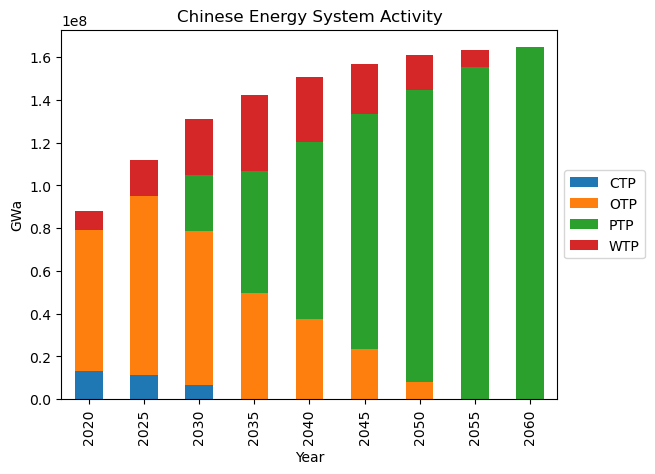

In [81]:
rep.set_filters(t=['CTP','WTP','OTP','PTP','BTP'])
rep.get("plot activity")

<Axes: title={'center': 'Chinese Energy System Capacity'}, xlabel='Year', ylabel='GW'>

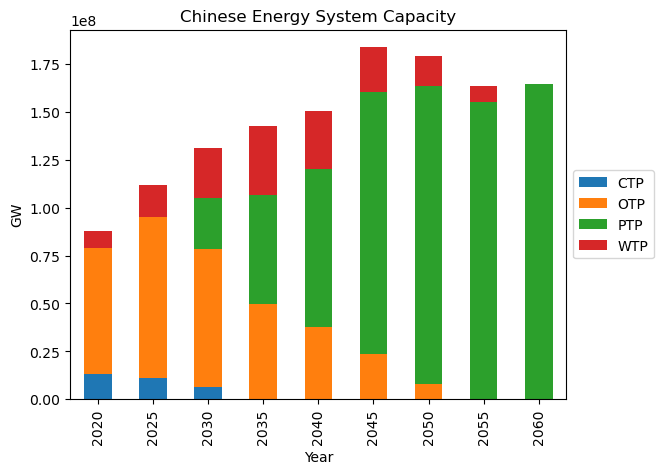

In [82]:
rep.set_filters(t=['CTP','WTP','OTP','PTP','BTP'])
rep.get("plot capacity")

<Axes: title={'center': 'Chinese Energy System Activity'}, xlabel='Year', ylabel='GWa'>

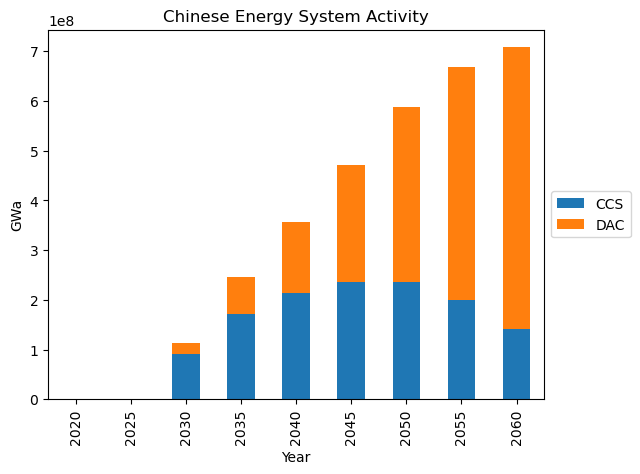

In [83]:
rep.set_filters(t=['DAC','CCS'])
rep.get("plot activity")

In [84]:
mp.close_db()